# Background

An airline company conducts a survey of satisfaction of its customer, where the customer rated the services of the airline company, and concluding it with whether they are satisfied, neutral or disatisfied with the airline services. The airline is used by many people to travel and not everyone is satisfied with the services that the airline company provides

# Problem Statement

The airline company wants to know what makes people satisfied with the services of the airline. This can help the airline company to identify where they need to improve on so that, their customer will be more satisfied with the services that the airline company and thus, make the customer wants to use the airline company again for their travels.

Based on the Customer Survey we can try to answer these questions:

What factor makes the customer satisfied or disatisfied with the service of the airline.

# Library

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [3]:
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Load the Data

In [4]:
df_air = pd.read_csv('D:/Downloads/airline passanger satisfaction.csv')

In [5]:
df_air

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


The data has 103904 rows and 25 columns

The dataset itself contains 

1. The Customer ID 
2. Gender of the Customer
3. How loyal the customer is
4. The customer age
5. Whether the travel is for personal reason or business reason 
6. What type of class the customer is using
7. The Distance of the Flight 
8. Satisfaction with in-flight wifi
9. Convenience of the Departure or Arrival Time
10. Then ease of online booking
11. The location of the boarding gate
12. The Satisfaction for Food and Drink
13. The Online Boarding Satisfaction
13. The Seat Comfort Satisfaction
14. The Inflight Entertainment Satisfaction
15. The on-board Service Satisfaction
16. The Leg room satisfaction
17. The Baggage Handling Satisfaction
18. The Check-in Service Satisfaction
19. The Inflight Service Satisfaction
20. The Cleanliness of the airlines
21. The Departure Delay in Minutes
22. The Arrival Delay in Minutes
23. The airline Satisfaction Level

In [6]:
list_unique = []

for col in df_air.columns:
    list_unique.append([col, df_air[col].nunique(), df_air[col].unique()])

pd.DataFrame(list_unique)

,0,1,2
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 8..."
2,Gender,2,"[Male, Female]"
3,Customer Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
5,Type of Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"


From what we can see in above dataframe, most of the data only consists of 0 to 5, this accounts to customer survey where the customer are given the survey with most category is rated from 0 to 5, other than that the satisfaction column combined the neutral satisfaction and disatisfaction into one category, while the other category is that the customer is satisfied with the airline

It can also be seen from the number of unique ID is equal to the number of rows of the data, this means that there are no duplicate data present in this dataset

# Data Cleaning

Since the Unnamed: 0 is merely the index of the dataset, the data can be dropped

In [7]:
df_air.drop(columns = ['Unnamed: 0', 'id'], inplace = True)

In [8]:
df_air

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [9]:
df_air.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df_air.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## Checking for any missing value within the Dataframe

In [11]:
df_air.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

It can be seen from above that there are no missing value in any of the remaining 23 columns, except for the arrival delay in minutes

In [12]:
df_air['Arrival Delay in Minutes'].isna().sum()/df_air.shape[0] * 100

0.29835232522328303

The data had missing value in Arrival Delay in Minutes Columns within 310 rows which is in total, 0.29% of the data, which means we can drop the data with the missing value since the percentage of missing value only accounts for 0.29% of the whole data which is so small.

In [13]:
df_air.dropna(inplace = True)

In [14]:
df_air.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
df_air.shape

(103594, 23)

After dropping all the missing value data in the arrival delay in minutes, it can be seen from above series, that there are no more missing value detected in any of the column of the data frame, 

It can be seen from the new shape of the data, there is now 103594 rows, which means that we drop 310 rows with the missing value. 

# Data Analysis

In [16]:
df_st = df_air['satisfaction'].value_counts()
df_st

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

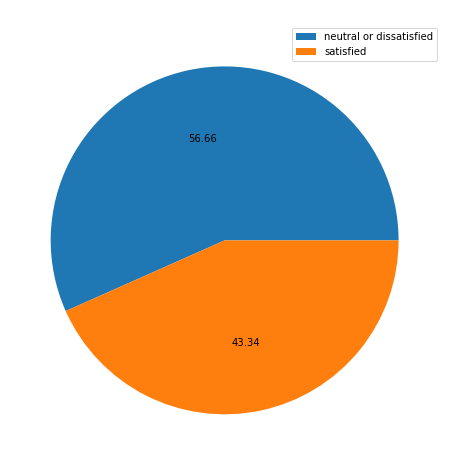

In [17]:
plt.figure(figsize = (10,8))
plt.pie(x = df_st, autopct = '%.2f')
plt.title('Pie Chart of Satisfaction of Customer', color = 'white' )
plt.legend(df_st.index)
plt.show()

From what can be seen from the satisfaction column, the number of neutral or dissatisfied customer is higher than the satisfied customer, with neutral or dissastisfied accounting for 58697 customers and satisfied accounting for 44897 customers.

Because, the number of data of satisfied customers proportion is not that far different from each other, around 10% difference.  So it can be said that it is more or less balanced

Next, we will try to find correlation between any of the numerical data that is contained inside the dataframe

In [18]:
df_air[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099838,-0.010150,-0.012147
Flight Distance,0.099838,1.000000,0.001906,-0.002426
Departure Delay in Minutes,-0.010150,0.001906,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


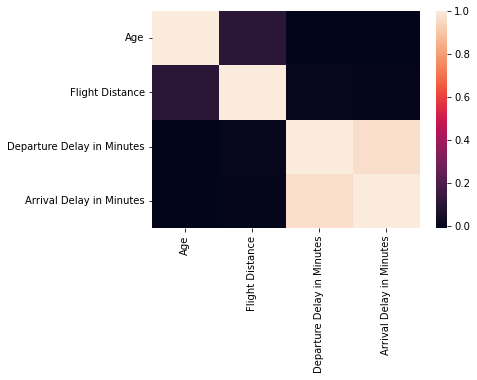

In [41]:
sns.heatmap(df_air[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr())
plt.show()

From the heatmap, the correlation between the departure delay in minutes and arrival delay in minutes is very big, so we will try to explore that relation below.

## Based on Customer Type

So, for the first one, we will try to analyze the customer type to try to answer thq question of whether customer loyalty have an effect towards customer satisfaction

In [20]:
df_type = pd.crosstab(df_air['Customer Type'], df_air['satisfaction'])
df_type['total'] = df_type['neutral or dissatisfied'] + df_type['satisfied']
df_type

satisfaction,neutral or dissatisfied,satisfied,total
Customer Type,,,
Loyal Customer,44249,40413,84662
disloyal Customer,14448,4484,18932


The number of loyal customer is far higher than the disloyal customer, it is better to compare in proportion since, the number will be biased. As can be seen from the cross tabulation the number of loyal customer filling the survey is 84923 and the disloyal is 18981.

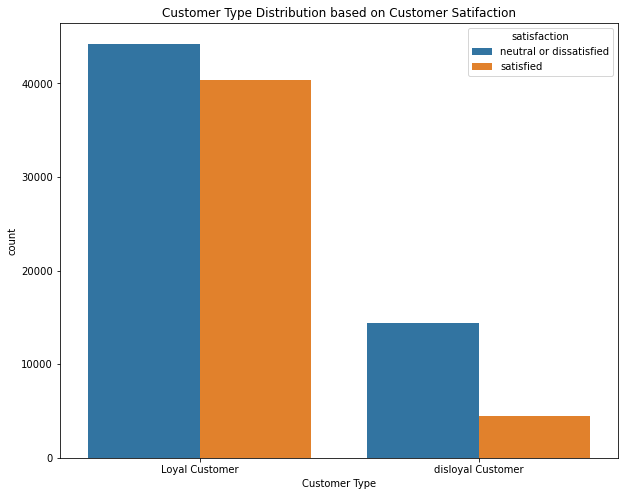

In [58]:
plt.figure(figsize = (10, 8))
sns.countplot(data = df_air, x = 'Customer Type', hue = 'satisfaction')
plt.title('Customer Type Distribution based on Customer Satifaction')
plt.show()

From above chart, it can be seen the number of loyal customer is far higher than disloyal customer, next we can test whether the proportion of loyal customer that are satisfied than the disloyal customer

In [52]:
stats, pval = proportions_ztest(df_type['satisfied'], df_type.sum(axis=1), alternative = 'smaller') 
if pval<=0.05:
    print('Reject H0', pval)
else:
    print('Fail to reject H0', pval)

Fail to reject H0 1.0


From the statistics test reult, we can also see that the proportion of the customer who are satisfied are far higher with customers who are loyal compared to the customer who are disloyal. 

From both the chart and the test, we can infer that most of our customers that filled in the survey is loyal customer, or customers who have used our airline company repeatedly, and from the test it can be inferred to that customer type does have an effect on the customer satisfaction

## Based on Age

Next, we analyze the age, to answer the question:
- What is the age range of our customers,
- What is the age range of our loyal customers,
- What is the age range of our disloyal customers

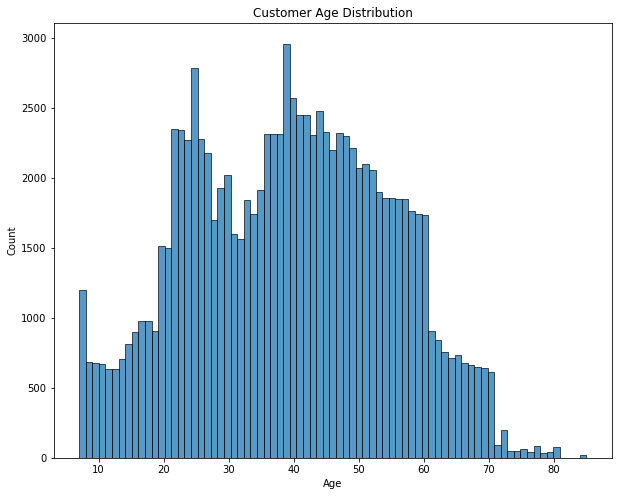

In [42]:
plt.figure(figsize = (10, 8))
sns.histplot(df_air['Age'])
plt.title('Customer Age Distribution')
plt.show()

It can be seen from the histogram above most of the customer that flew using this airline company are mostly within an age range of around 30 and 40

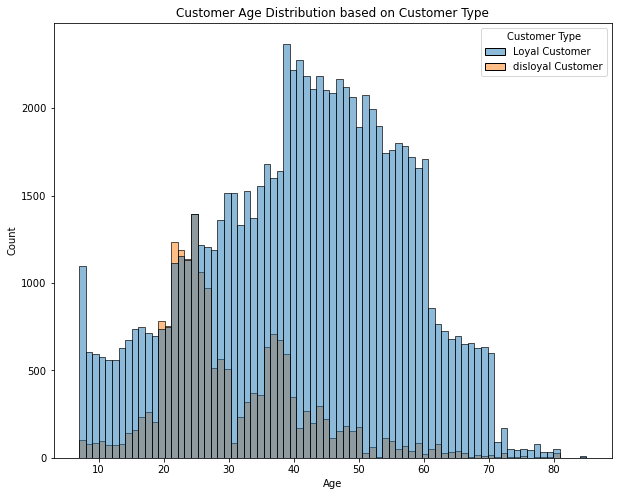

In [45]:
plt.figure(figsize = (10, 8))
sns.histplot(data = df_air, x = 'Age', hue = 'Customer Type')
plt.title('Customer Age Distribution based on Customer Type')
plt.show()

We can see from the the chart above that, for our loyal customer most of them range from 40 to 60 and the most of the disloyal customer is aged at around 20 to 30

## Based on Flight Distance

Next, we will analyze the flight distance to answer the questions:
- What do most of our customers fly for, shorter distance or long distance,
- Based on flight distance, what does our customer tends to use for the seat class,
- Based on the flight distance, how satisfied our customer with our service

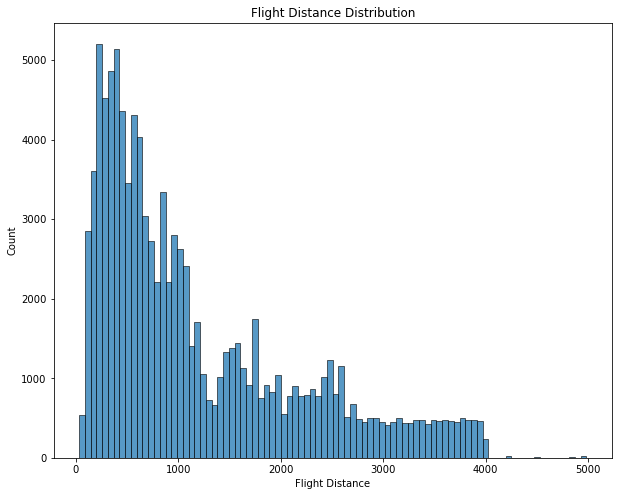

In [48]:
plt.figure(figsize = (10, 8))
sns.histplot(df_air['Flight Distance'])
plt.title('Flight Distance Distribution')
plt.show()

It can be seen from above graph, that most customer that fills in the survey for the airline company uses the airline company for shorter flight at around 0 to 1000 

Next we can try to see what the seat class that the customers are using for shorter and longer flight distance

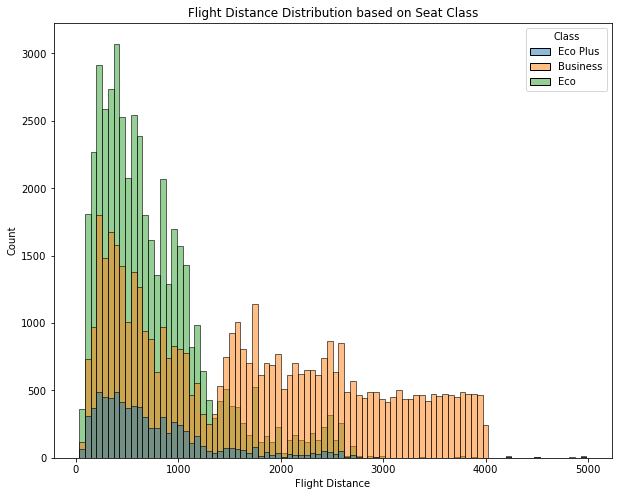

In [47]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'Flight Distance', hue = 'Class', data = df_air)
plt.title('Flight Distance Distribution based on Seat Class')
plt.show()

It can be seen from above graph that as, the flight distance get longer, most customers will start to prefer to fly using the business class

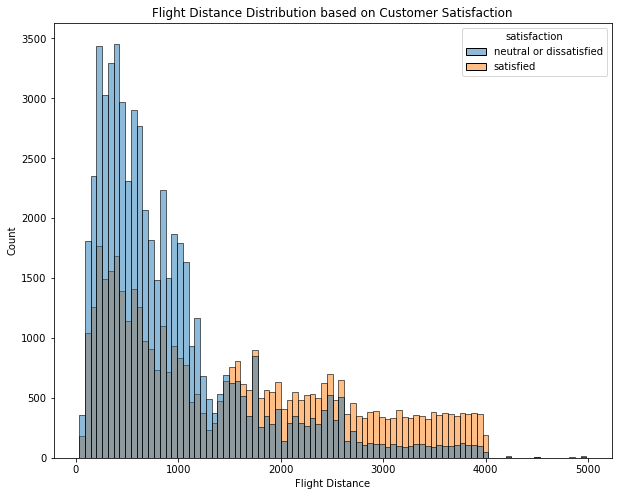

In [46]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'Flight Distance', hue = 'satisfaction', data = df_air)
plt.title('Flight Distance Distribution based on Customer Satisfaction')
plt.show()

It can be seen from the histogram above, that in shorter flight distance, far more people are dissatisfied with the airline company service

## Based on Type of Travel and Class

From above flight distance analysis we can see, that the seat class seems to have an effect on the satisfaction of the customer, so we will see if that is true.

We will also try to find the relationship between type of travel and class.

In [27]:
pd.crosstab(df_air['satisfaction'], df_air['Type of Travel'])

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29831,28866
satisfied,41634,3263


From the cross tabulation between satisfaction and type of travel, Business Traveler are usually more satisfied with the airline service than Personal Traveler.

We can try to see the cross tabulation to see the count of business traveler using which class of the airline

In [28]:
pd.crosstab([df_air['Type of Travel'], df_air['Class']], df_air['satisfaction'])

satisfaction              neutral or dissatisfied  satisfied
Type of Travel  Class                                       
Business travel Business                    13258      34126
                Eco                         14219       5983
                Eco Plus                     2354       1525
Personal Travel Business                     1885        264
                Eco                         23703       2688
                Eco Plus                     3278        311

It can be seen that business traveler tends to use business class rather than economy, and the opposite can be said with the personal traveller, where they are more likely to travel in economy class. In the usual setting, business class passengers are given better service than the economy class passenger, which definitely accounts for customer satisfaction

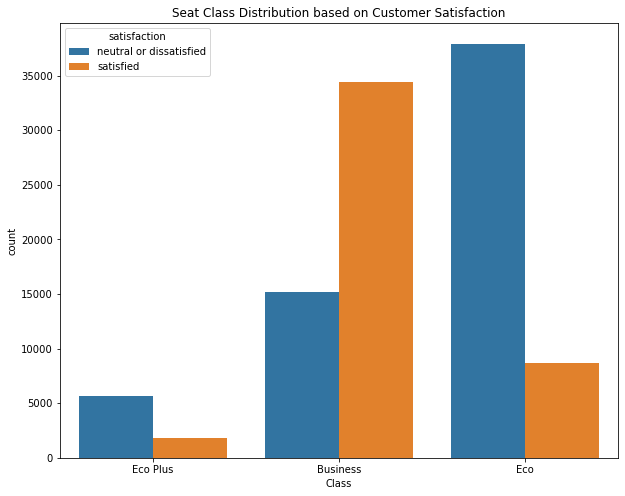

In [59]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Class', hue = 'satisfaction', data = df_air)
plt.title('Seat Class Distribution based on Customer Satisfaction')
plt.show()

As can be seen from the Histogram Above, customers that flew using economy and economy plus class are highly dissatisfied with the airline company service, and that the customers that flew using Business class are more satisfied with the airline service

## Based on Customer Satisfaction Ratings

In this part, we will analyze the effect of the customer satisfaction ratings on the airline services on the customer satisfaction with the airline company to answer the questions:
- What customer service affects the customer satisfaction heavily?
- Does higher customer service rating affects customer satisfaction?

First, we separate all the customer satisfaction ratings to one dataframe so that we can use the dataframe's columns to create the histograms based on the customer satisfaction ratings

In [30]:
df_stl = df_air.drop(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], axis = 1)
df_stl

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


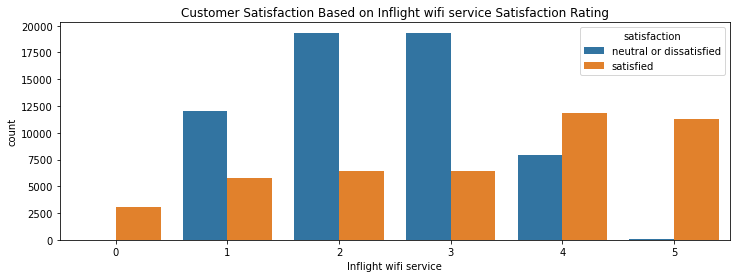

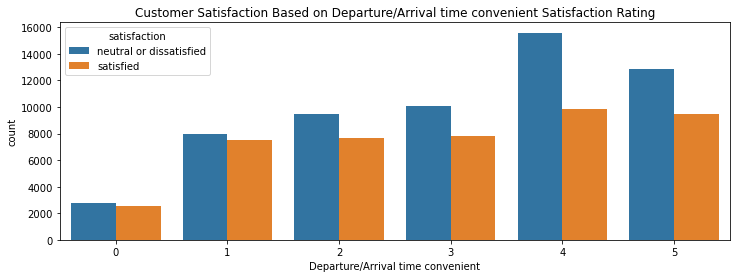

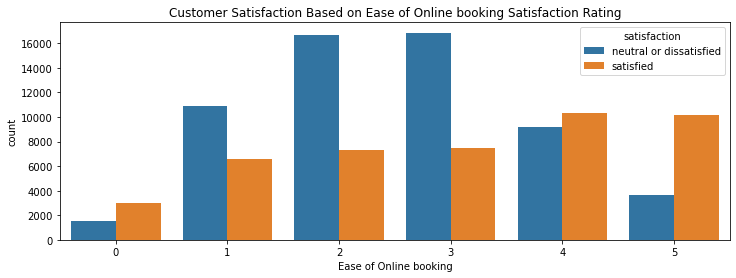

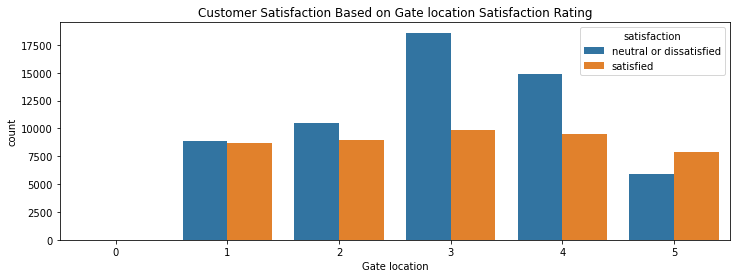

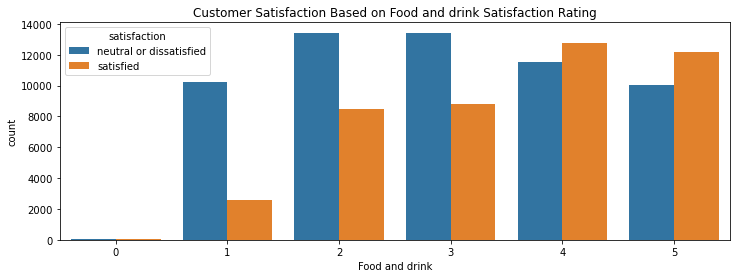

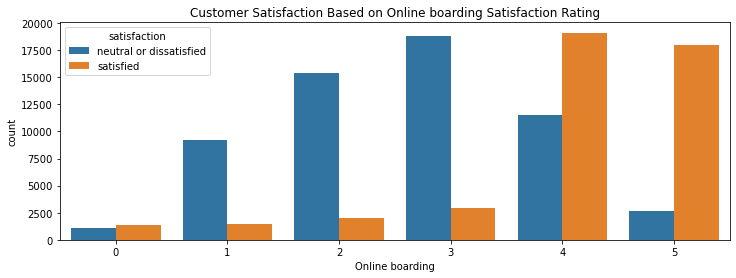

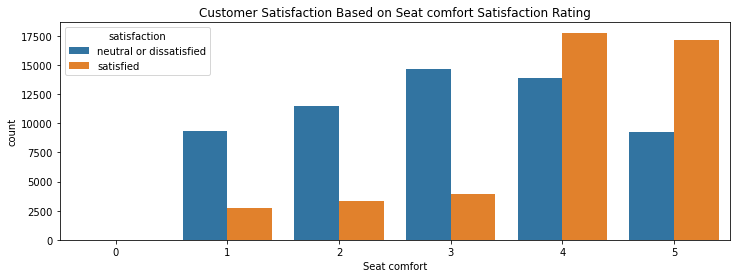

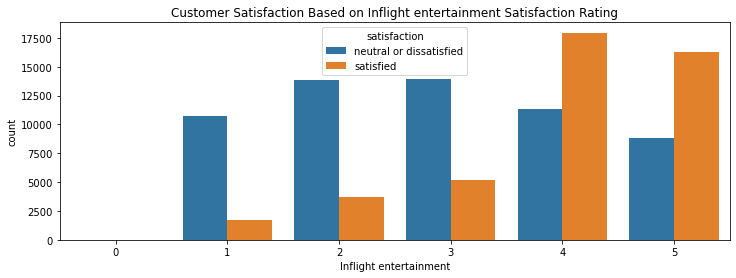

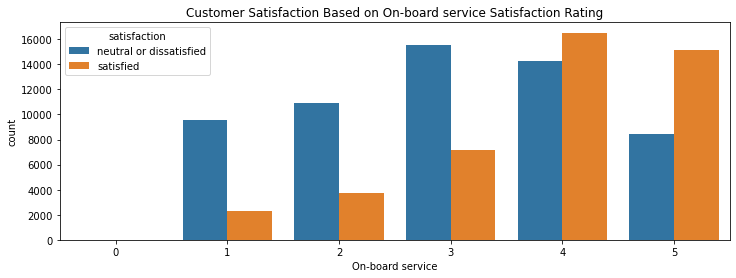

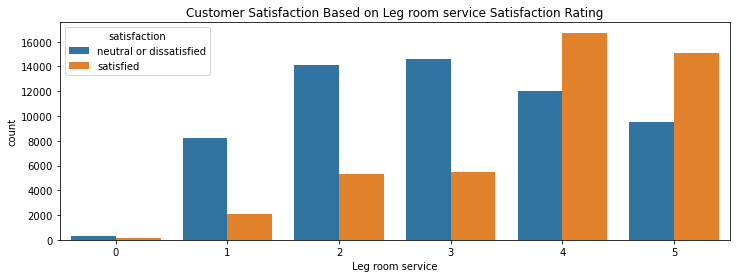

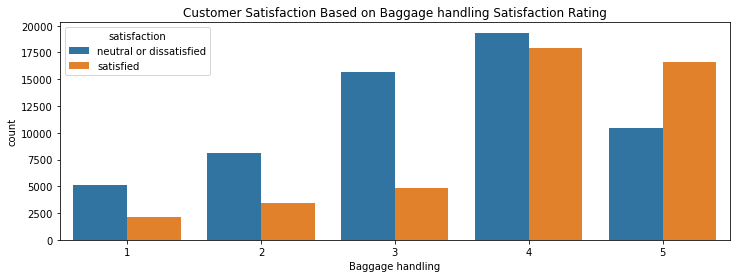

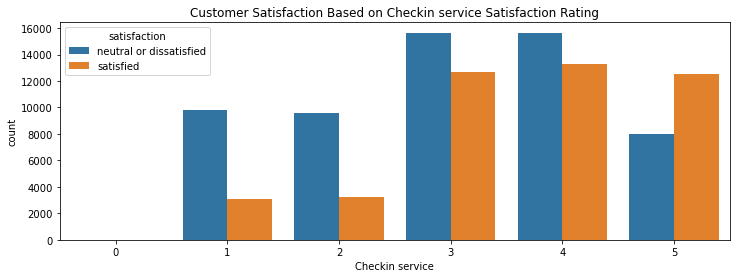

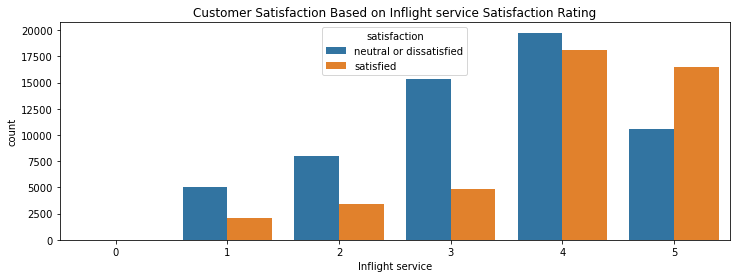

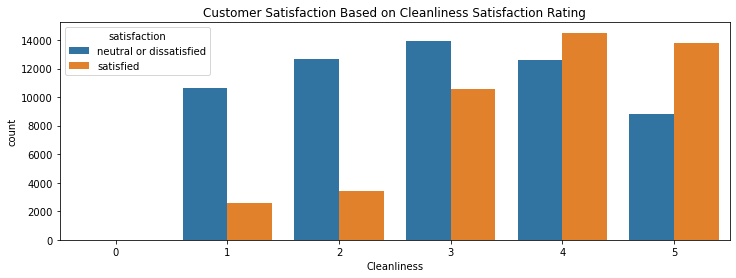

In [62]:
for i in df_stl.columns:
    plt.figure(figsize = (12, 4))
    sns.countplot(data = df_air, x = i, hue = 'satisfaction')
    plt.title('Customer Satisfaction Based on {} Satisfaction Rating'.format(i))
    plt.show()

It can also be seen from most of the histogram above, if the service rating is rated 5, it is more likely for customer to be satisfied with the airline company, this is especially true in the inflight wifi service, with customers that rated the inflight wifi service with a 5, will almost likely be satisfied with the airline service. But, it can be seen for most of the customer satisfaction ratings, if the customer rated the service at 4 or 5, they are more likely to be satisfied with the airline company service

However, it seems that it does not seem that the customers that rated departure/arrival time convinience rating with a 4 or 5 to be satisfied with the airline company, it may be because that there are delay on the departure or arrival delay that can effect the customer satisfaction

## Airline Departure/Arrival Delay

Next, we will try to explore the relationship between the departure delay and arrival delay, to answer the question:
- From heatmap above, it can be seen that airline departure and arrival delay has a heavy correlation, is it true?
- What is the relationship between airline departure and arrival delay

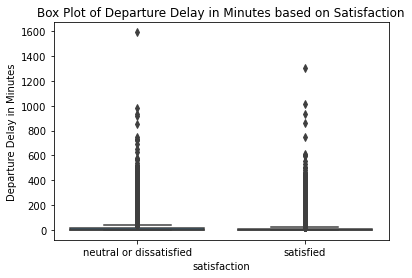

In [32]:
sns.boxplot(y = df_air['Departure Delay in Minutes'], x = df_air['satisfaction'])
plt.title('Box Plot of Departure Delay in Minutes based on Satisfaction')
plt.show()

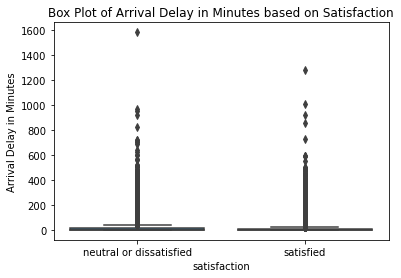

In [33]:
sns.boxplot(y = df_air['Arrival Delay in Minutes'], x = df_air['satisfaction'])
plt.title('Box Plot of Arrival Delay in Minutes based on Satisfaction')
plt.show()

It can be seen from the boxplots above that the arrival and departure delay had a small interquartile range but, it had outliers that is very big in both neutral or dissatisfied part and the satisfied part

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

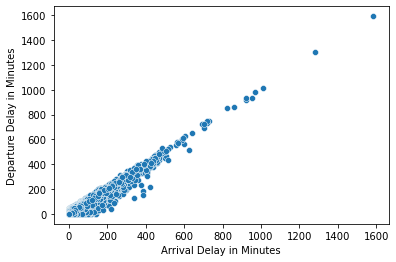

In [34]:
sns.scatterplot(data = df_air, x = 'Arrival Delay in Minutes', y = 'Departure Delay in Minutes')

From the scatterplot above, we can see that, the relationship between departure and arrival delay is linear and does have a strong correlation with each other as can be seen from the heatmap, which makes sense, since if the departure of the airplane is delayed so will the arrival of the airplane.

In [35]:
df_air[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']].groupby('satisfaction').describe()

Departure Delay in Minutes                             \
                                             count       mean        std  min   
satisfaction                                                                    
neutral or dissatisfied                    58697.0  16.431913  40.046146  0.0   
satisfied                                  44897.0  12.546362  35.315723  0.0   

                                                Arrival Delay in Minutes  \
                         25%  50%   75%     max                    count   
satisfaction                                                               
neutral or dissatisfied  0.0  0.0  15.0  1592.0                  58697.0   
satisfied                0.0  0.0   9.0  1305.0                  44897.0   

                                                                            
                              mean        std  min  25%  50%   75%     max  
satisfaction                                                                
neutral or dissatisfied  17.127536  40.560248  0.0  0.0  0.0  17.0  1584.0  
satisfied                12.630799  35.962008  0.0  0.0  0.0   8.0  1280.0

It can be seen from the table above that the mean of both the departure delay and arrival delay had a little difference, but certainly, customer are more neutral or dissatisfied if the arrival or departure delay is higher.

## Based on Gender

We will analyze customer satisfaction by gender, whether gender had an effect on customer satisfaction?

In [36]:
df_gender = pd.crosstab(df_air['Gender'], df_air['satisfaction'])
df_gender['total'] = df_gender['neutral or dissatisfied'] + df_gender['satisfied']
df_gender

satisfaction,neutral or dissatisfied,satisfied,total
Gender,,,
Female,30107,22469,52576
Male,28590,22428,51018


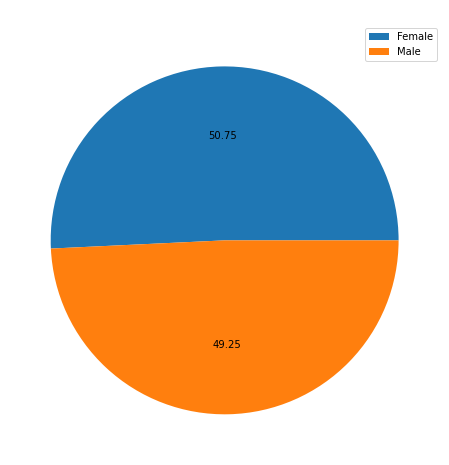

In [37]:
plt.figure(figsize = (8, 8))
plt.pie(df_gender['total'], autopct = '%.2f')
plt.title('Pie chart on Gender of the Customer', color = 'white')
plt.legend(df_gender.index)
plt.show()

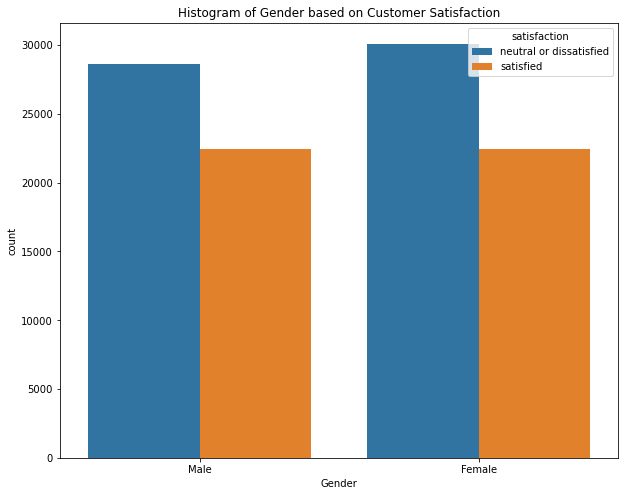

In [61]:
plt.figure(figsize = (10,8))
sns.countplot(data = df_air, x = 'Gender', hue = 'satisfaction')
plt.title('Histogram of Gender based on Customer Satisfaction')
plt.show()

In [39]:
df_gender

satisfaction,neutral or dissatisfied,satisfied,total
Gender,,,
Female,30107,22469,52576
Male,28590,22428,51018


In [40]:
score, pval, dof, exp = chi2_contingency(df_gender.drop('total', axis = 1))
if pval<=0.05:
    print('Reject H0', pval)
else:
    print('Fail to reject H0', pval)

Reject H0 7.168224693815838e-05


From the Pie Chart, it can be seen that the gender of the customer in the data, female has a higher number but the difference is not that big and only has a difference of around 1.5%, and from the bar chart, the amount of each gender based on customer satisfaction is more or less the same.

From the chi2 test, since the null hypothesis is rejected, it can be said that gender does had an effect on the customer satisfaction

# Conclusion and Recommendation

From the Data analysis above, we can infer several things regarding the customer:
- From the 103594 customer data, the number of satisfied customer in the data is only 45025, which is only 43.03% of the total
- The age range of most of our customer is around 30 to 40 years old, with loyal customer having an age range of 40 to 60 and disloyal customer having an age range of 20 to 30 years old
- From the customer seat class, we can infer that most of the customer that is satisfied mostly comes from the business class
- It can be seen that customers are mostly dissatisfied with the economy and economy plus class services
- We can also see that from the purpose of the travel, we can see most people uses the airline company for business reason
- And we can see that customers that travel for business, has a higher satisfaction rate than the personal
- That can be because most of the business reason customers, uses the business seat class.
- We can also say that if the customer is highly satisfied, which means they rate it as a 5, with the inflight wifi service, they are usually satisfied with the airline
- Most of the customers in the survey are Loyal Customers or Customer who preferred using the airline company
- Gender of the customer does influence the customer satisfaction with the airline company and in this data the number of male and female customers are nearly equal also the customer satisfaction also has more or less equal between male and female
- With longer flight distance, customers tends to prefer to fly using business class
- Customers are highly dissatisfied with the service that the economy and economy plus class service, while people that flew using business class are more satisfied with the airline company service

## Recommendation

1. Add more incentive for repeat customers
2. Add more incentive for customer for longer flight distance
3. Add incentives for people that flew for business reasons
3. Increase the overall quality of service of the economy and economy plus class
4. Prioritize in the enhancement in the quality of inflight wifi service, across the classes
5. Try to reduce the delay in the departure and arrival
6. Do not give a big disparity on the service between the economy and the business class